In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import os
import pandas as pd



## The entropy of the microtubule

not really pixel intensity. 

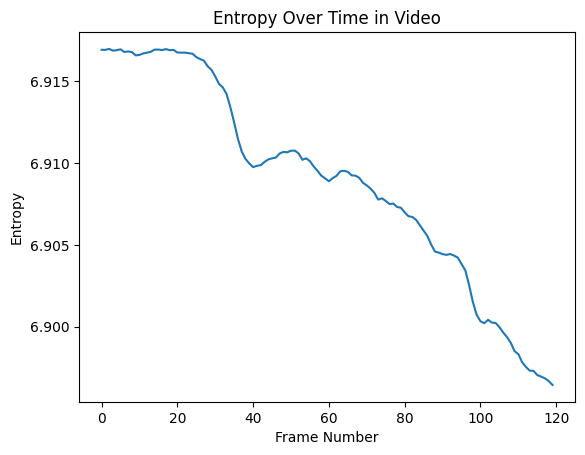

In [2]:
def calculate_grid_entropy(image, grid_size=(10, 10)):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy

# Replace 'path_to_your_video.mp4' with your video file path
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/145_2.avi'
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()


In [3]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)

    entropy_over_time = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        entropy = calculate_grid_entropy(gray_frame)
        entropy_over_time.append(entropy)
        frame_count += 1

    cap.release()
    return entropy_over_time, frame_count

In [4]:
folder_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_4/'


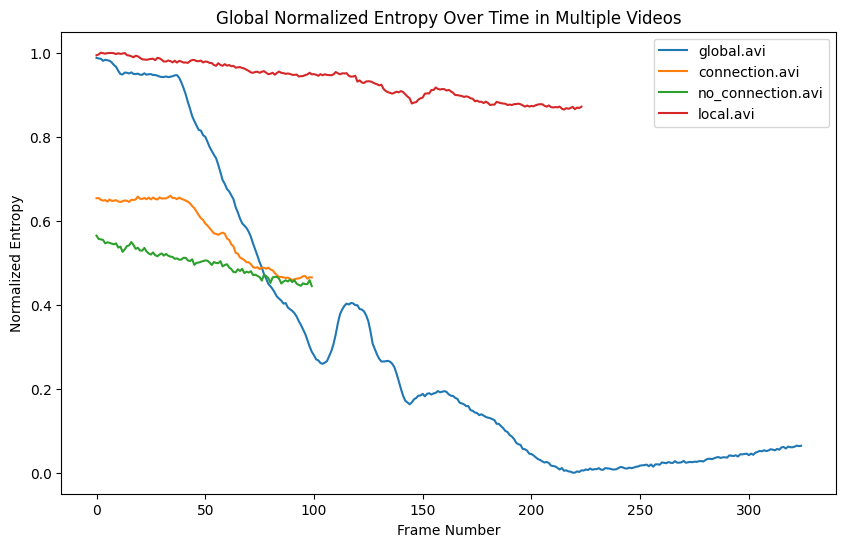

In [5]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = {}

for video_file in video_files:
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    video_data[video_file] = (entropy_over_time, frame_count)
    all_entropies.extend(entropy_over_time)

# Global Normalization
min_entropy = min(all_entropies)
max_entropy = max(all_entropies)

plt.figure(figsize=(10, 6))

for video_file, (entropy_over_time, frame_count) in video_data.items():
    normalized_entropy = [(e - min_entropy) / (max_entropy - min_entropy) for e in entropy_over_time]
    plt.plot(range(frame_count), normalized_entropy, label=video_file)

plt.xlabel('Frame Number')
plt.ylabel('Normalized Entropy')
plt.title('Global Normalized Entropy Over Time in Multiple Videos')
plt.legend()
plt.show()

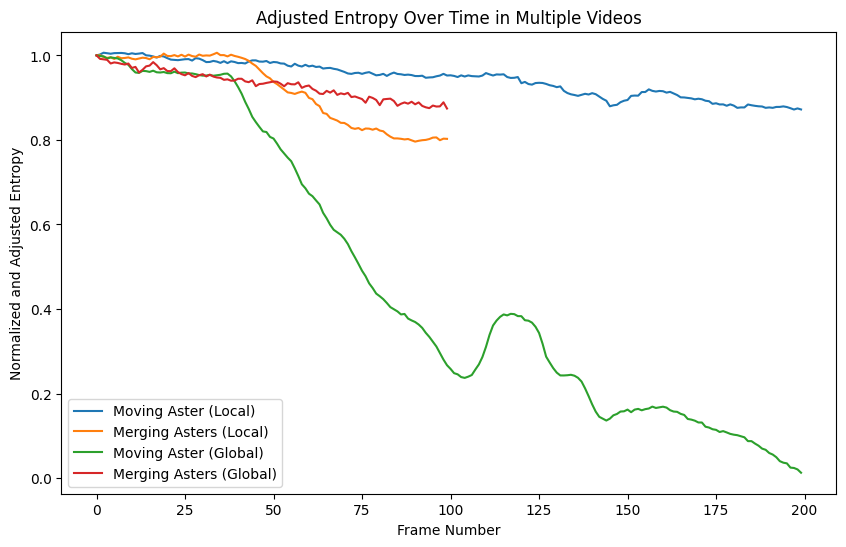

In [7]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = {}

for video_file in video_files:
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    video_data[video_file] = (entropy_over_time[:200], min(frame_count, 200))  # Limit to first 200 frames
    all_entropies.extend(entropy_over_time[:200])

# Global Normalization
min_entropy = min(all_entropies)
max_entropy = max(all_entropies)

plt.figure(figsize=(10, 6))

for video_file, (entropy_over_time, frame_count) in video_data.items():
    normalized_entropy = [(e - min_entropy) / (max_entropy - min_entropy) for e in entropy_over_time]
    
    # Offset to start at 1
    offset = 1 - normalized_entropy[0]
    adjusted_entropy = [e + offset for e in normalized_entropy]

    # Remove '.avi' from the video file name for the legend
    label = video_file.replace('.avi', '')
    plt.plot(range(frame_count), adjusted_entropy, label=label)

plt.xlabel('Frame Number')
plt.ylabel('Normalized and Adjusted Entropy')
plt.title('Adjusted Entropy Over Time in Multiple Videos')
plt.legend()
plt.show()


In [6]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = []

for video_file in video_files:
    incubation_time = int(video_file.split('_')[0])  # Extracting incubation time
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    min_entropy = min(entropy_over_time)
    video_data.append({'Video Name': video_file, 'Incubation Time': incubation_time, 'Min Entropy': min_entropy})

# Create DataFrame
df = pd.DataFrame(video_data)

# Global Normalization of Min Entropy
min_entropy_global = df['Min Entropy'].min()
max_entropy_global = df['Min Entropy'].max()
df['Normalized Min Entropy'] = (df['Min Entropy'] - min_entropy_global) / (max_entropy_global - min_entropy_global)



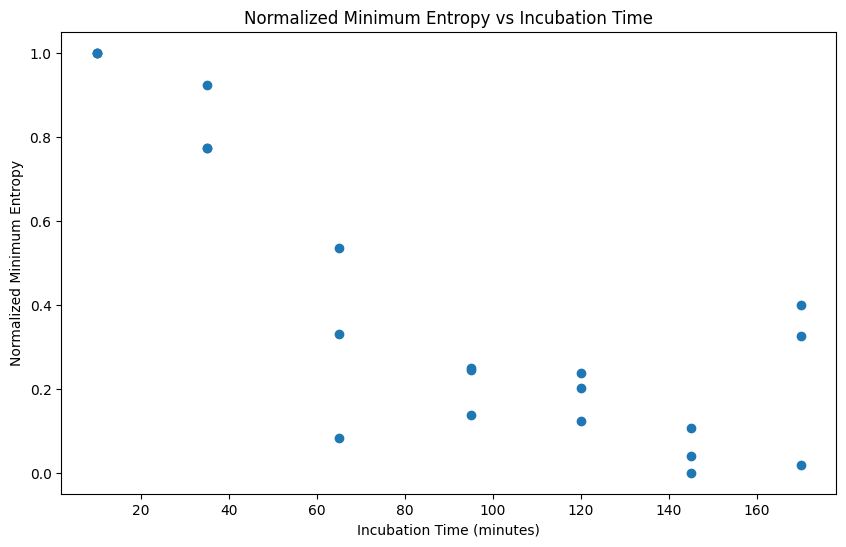

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Incubation Time'], df['Normalized Min Entropy'])
plt.xlabel('Incubation Time (minutes)')
plt.ylabel('Normalized Minimum Entropy')
plt.title('Normalized Minimum Entropy vs Incubation Time')
plt.show()

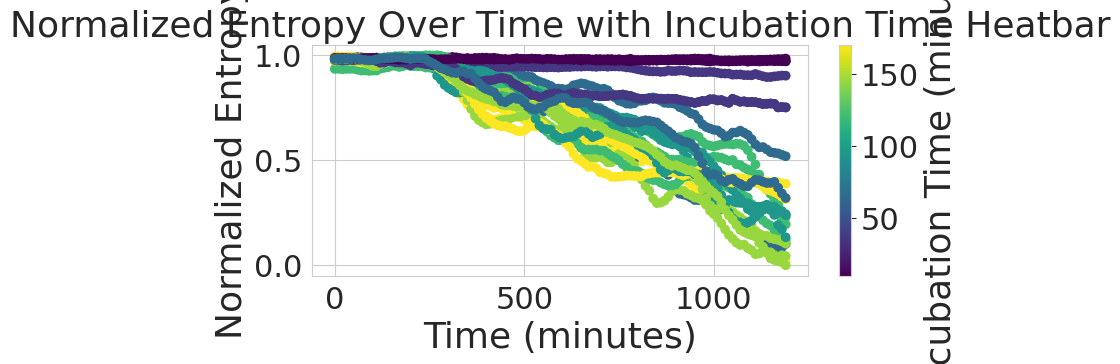

In [11]:

video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = []

for video_file in video_files:
    incubation_time = int(video_file.split('_')[0])  # Extracting incubation time
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    for i in range(frame_count):
        video_data.append({'Frame Number': i, 'Entropy': entropy_over_time[i], 'Incubation Time': incubation_time})

# Create DataFrame
df = pd.DataFrame(video_data)

# Normalize entropy values
min_entropy = df['Entropy'].min()
max_entropy = df['Entropy'].max()
df['Normalized Entropy'] = (df['Entropy'] - min_entropy) / (max_entropy - min_entropy)

# Plotting
plt.figure(figsize=(8, 3))
sc = plt.scatter(df['Frame Number']*10, df['Normalized Entropy'], c=df['Incubation Time'], cmap='viridis')
plt.colorbar(sc, label='Incubation Time (minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized Entropy')
plt.title('Normalized Entropy Over Time with Incubation Time Heatbar')
plt.show()


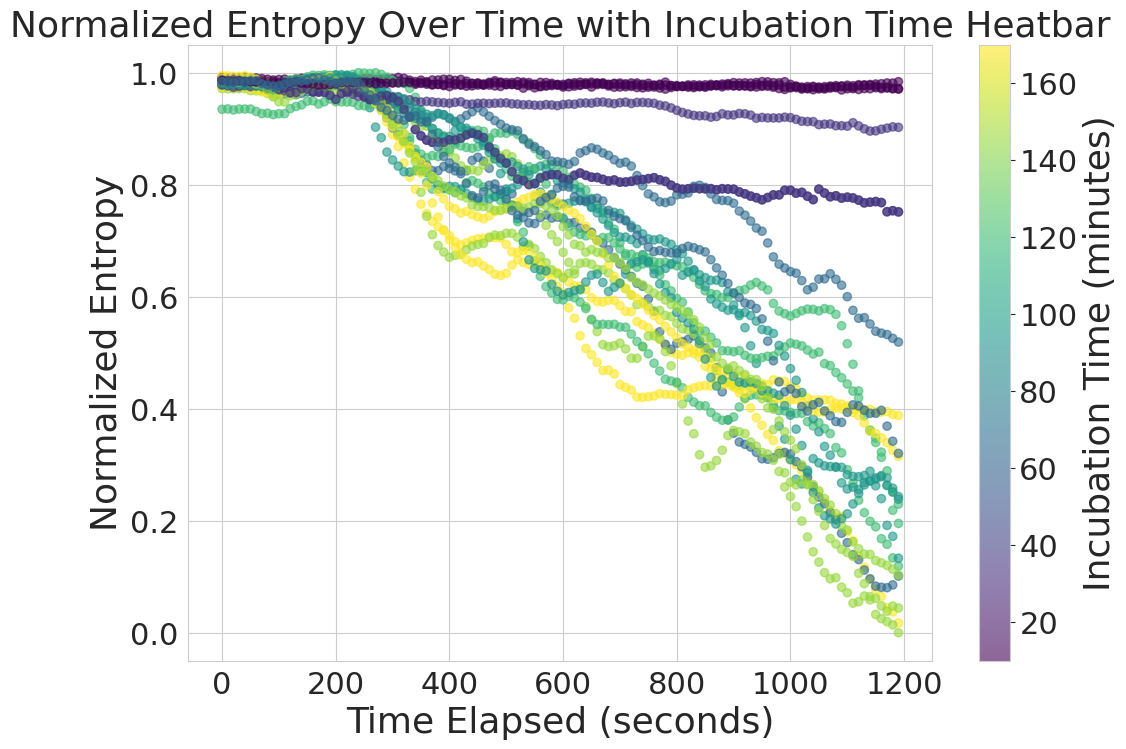

In [12]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = []

for video_file in video_files:
    incubation_time = int(video_file.split('_')[0])  # Extracting incubation time
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    for i in range(frame_count):
        time_elapsed = i * 10  # Each frame is 10 seconds apart
        video_data.append({'Time (seconds)': time_elapsed, 'Entropy': entropy_over_time[i], 'Incubation Time': incubation_time})

# Create DataFrame
df = pd.DataFrame(video_data)

# Normalize entropy values
min_entropy = df['Entropy'].min()
max_entropy = df['Entropy'].max()
df['Normalized Entropy'] = (df['Entropy'] - min_entropy) / (max_entropy - min_entropy)

# Plotting
plt.figure(figsize=(12, 8))
sc = plt.scatter(df['Time (seconds)'], df['Normalized Entropy'], c=df['Incubation Time'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Incubation Time (minutes)')
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('Normalized Entropy')
plt.title('Normalized Entropy Over Time with Incubation Time Heatbar')
plt.show()

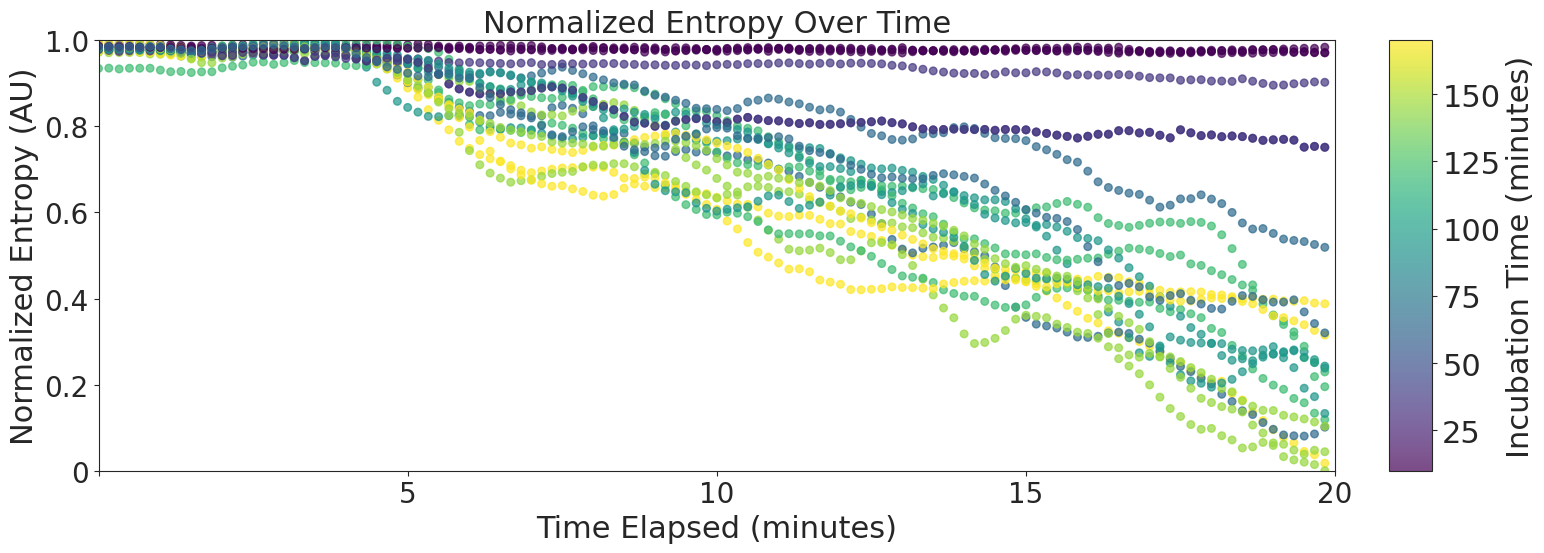

In [18]:
# Set the style of seaborn for prettier plots
sns.set_style('ticks')

# Set larger font sizes
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
# Plotting
plt.figure(figsize=(16, 6))
sc = plt.scatter(df['Time (seconds)']/60, df['Normalized Entropy'], c=df['Incubation Time'], cmap='viridis', alpha=0.7, s=30)
cbar = plt.colorbar(sc, label='Incubation Time (minutes)', aspect = 10, fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=22)  # Adjust colorbar tick label size if needed
plt.xlabel('Time Elapsed (minutes)')
plt.ylabel('Normalized Entropy (AU)')
plt.title('Normalized Entropy Over Time')
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.xlim(left=0)
plt.xlim(right=20)

# Customizing ticks to remove duplicate zero
plt.xticks(ticks=[0, 5, 10, 15, 20], labels=['', '5', '10', '15', '20'])  # Assuming these are the x-ticks you want
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0', '0.2', '0.4', '0.6', '0.8', '1.0'])  # Setting y-ticks


plt.tight_layout()
plt.show()

## Old

In [6]:
def calculate_entropy(image):
    """Calculate the entropy of an image."""
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
    return entropy


def process_avi_files(folder_path):
    """Process all AVI files in the given folder and store results in a DataFrame."""
    data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".avi"):
            # Extract time in minutes from the filename
            time_in_minutes = int(re.match(r"(\d+)", filename).group(1))

            cap = cv2.VideoCapture(os.path.join(folder_path, filename))

            frame_count = 0
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                entropy = calculate_entropy(gray_frame)
                data.append({'Video': filename, 'Time': frame_count, 'Entropy': entropy, 'Aging time (minutes)': time_in_minutes})
                frame_count += 1

            cap.release()

    return pd.DataFrame(data)

def relative_change_normalize_entropy(df):
    """Normalize the entropy in the DataFrame based on the initial entropy of each video."""
    def normalize(group):
        initial_entropy = group.iloc[0]['Entropy']
        group['Normalized_Entropy'] = (group['Entropy'] - initial_entropy) / initial_entropy
        return group
    
    return df.groupby('Video').apply(normalize)


In [1]:
import numpy as np
import cv2

def calculate_microtubule_dynamics(video_frames, grid_size):
    """
    Analyze microtubule dynamics in video frames.

    :param video_frames: List of video frames (as numpy arrays).
    :param grid_size: Tuple indicating the number of cells in the grid (rows, cols).
    :return: Array of entropy values for each grid cell.
    """
    # Initialize an array to hold entropy values for each cell
    entropy_grid = np.zeros(grid_size)

    # Determine the size of each cell
    frame_height, frame_width = video_frames[0].shape[:2]
    cell_height = frame_height // grid_size[0]
    cell_width = frame_width // grid_size[1]

    # Iterate over each cell in the grid
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Extract the cell across all frames
            cell_frames = [frame[i*cell_height:(i+1)*cell_height, j*cell_width:(j+1)*cell_width] for frame in video_frames]

            # Calculate the intensity variation and entropy for the cell
            cell_entropy = calculate_cell_entropy(cell_frames)
            entropy_grid[i, j] = cell_entropy

    return entropy_grid

def calculate_cell_entropy(cell_frames):
    """
    Calculate the entropy of a cell across multiple frames.

    :param cell_frames: List of frames representing a single cell over time.
    :return: Entropy value for the cell.
    """
    # Concatenate all cell frames into a single 3D array
    cell_stack = np.stack(cell_frames, axis=2)

    # Calculate histogram for the stacked cell
    hist = cv2.calcHist([cell_stack], [0], None, [256], [0, 256])
    hist = hist / hist.sum()

    # Calculate entropy
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
    return entropy

def load_video_frames(video_path):
    """
    Load video and extract frames.

    :param video_path: Path to the video file.
    :return: List of frames as numpy arrays.
    """
    frames = []
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    return frames

In [2]:
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/10_1.avi'
video_frames = load_video_frames(video_path)
grid_size = (10, 10)  # Example grid size

In [3]:
entropy_map = calculate_microtubule_dynamics(video_frames, grid_size)


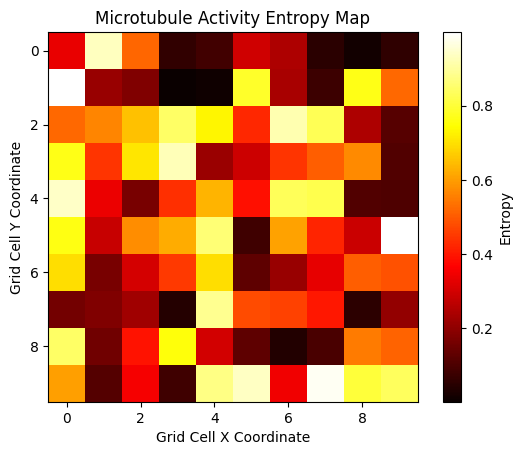

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming entropy_map is a NumPy array from your function
entropy_map = np.random.rand(10, 10)  # Example data, replace with your entropy map

plt.imshow(entropy_map, cmap='hot', interpolation='nearest')
plt.colorbar(label='Entropy')
plt.title('Microtubule Activity Entropy Map')
plt.xlabel('Grid Cell X Coordinate')
plt.ylabel('Grid Cell Y Coordinate')
plt.show()


In [6]:
def calculate_frame_entropy(video_frames, grid_size):
    """
    Calculate the total entropy for each frame in the video.

    :param video_frames: List of video frames (as numpy arrays).
    :param grid_size: Tuple indicating the number of cells in the grid (rows, cols).
    :return: List of total entropy values for each frame.
    """
    frame_entropies = []

    # Determine the size of each cell
    frame_height, frame_width = video_frames[0].shape[:2]
    cell_height = frame_height // grid_size[0]
    cell_width = frame_width // grid_size[1]

    # Calculate entropy for each frame
    for frame in video_frames:
        total_entropy = 0
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                # Extract the cell from the frame
                cell = frame[i*cell_height:(i+1)*cell_height, j*cell_width:(j+1)*cell_width]

                # Calculate and sum up the entropy for each cell
                cell_entropy = calculate_cell_entropy([cell])  # The function expects a list of frames
                total_entropy += cell_entropy

        frame_entropies.append(total_entropy)

    return frame_entropies



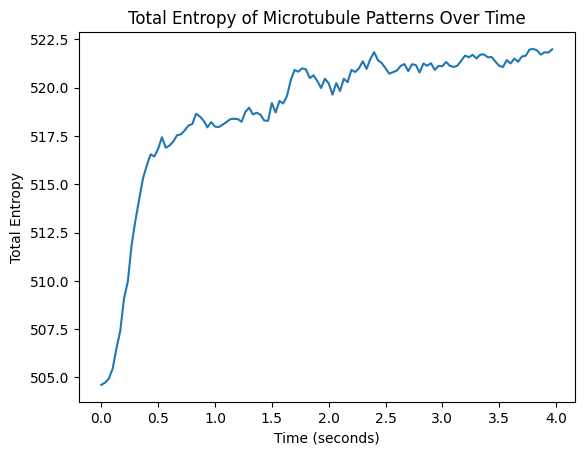

In [7]:
import matplotlib.pyplot as plt

# Assuming video_frames is a list of frames from your video
grid_size = (10, 10)  # Define your grid size
total_entropies = calculate_frame_entropy(video_frames, grid_size)

# Generate time points for x-axis (assuming constant frame rate)
frame_rate = 30  # Example frame rate, replace with your video's frame rate
time_points = [i / frame_rate for i in range(len(total_entropies))]

plt.plot(time_points, total_entropies)
plt.xlabel('Time (seconds)')
plt.ylabel('Total Entropy')
plt.title('Total Entropy of Microtubule Patterns Over Time')
plt.show()


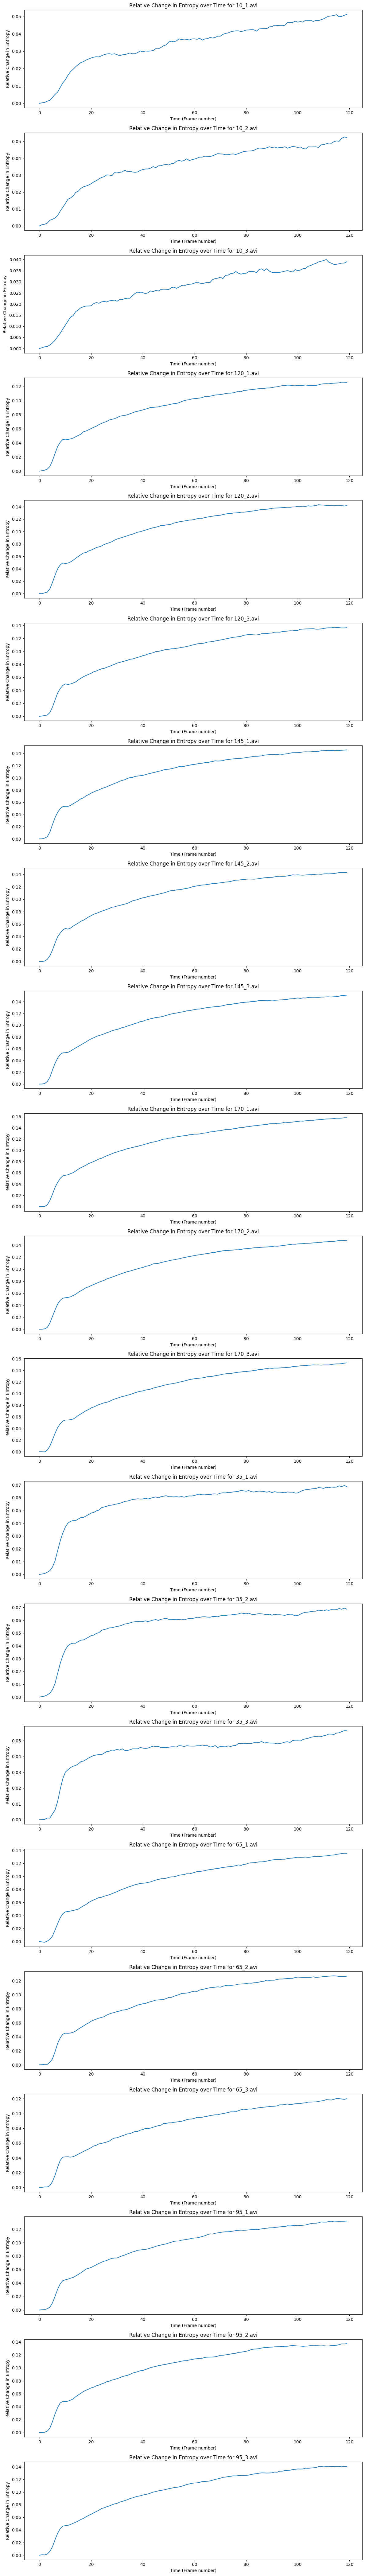

In [10]:

# Folder containing AVI files
folder_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy'  # Replace with your folder path

# Process AVI files and normalize entropy based on relative change
df = process_avi_files(folder_path)
df = relative_change_normalize_entropy(df)

# Plotting each video in an individual plot with normalized entropy
unique_videos = df['Video'].unique()
num_videos = len(unique_videos)
plt.figure(figsize=(12, 4 * num_videos))

for i, video_name in enumerate(unique_videos, 1):
    plt.subplot(num_videos, 1, i)
    video_df = df[df['Video'] == video_name]
    plt.plot(video_df['Time'], video_df['Normalized_Entropy'])
    plt.title(f'Relative Change in Entropy over Time for {video_name}')
    plt.xlabel('Time (Frame number)')
    plt.ylabel('Relative Change in Entropy')

plt.tight_layout()
plt.show()


In [11]:
df

Video  Time   Entropy  Aging time (minutes)  \
Video                                                           
10_1.avi 0     10_1.avi     0  5.233050                    10   
         1     10_1.avi     1  5.234734                    10   
         2     10_1.avi     2  5.235712                    10   
         3     10_1.avi     3  5.239658                    10   
         4     10_1.avi     4  5.242065                    10   
...                 ...   ...       ...                   ...   
95_3.avi 2035  95_3.avi   115  6.001877                    95   
         2036  95_3.avi   116  6.002316                    95   
         2037  95_3.avi   117  6.004590                    95   
         2038  95_3.avi   118  6.001196                    95   
         2039  95_3.avi   119  6.003208                    95   

               Normalized_Entropy  
Video                              
10_1.avi 0               0.000000  
         1               0.000322  
         2               0.000509  
         3               0.001263  
         4               0.001723  
...                           ...  
95_3.avi 2035            0.140358  
         2036            0.140441  
         2037            0.140873  
         2038            0.140228  
         2039            0.140610  

[2520 rows x 5 columns]

In [12]:
# Assuming 'df' is your DataFrame with the entropy data
# Define a DataFrame to hold the results
peak_times_df = pd.DataFrame(columns=['Video', 'Frame', 'Aging time (minutes)', 'Peak_Entropy', 'Peak_Frame'])

for video_name in df['Video'].unique():
    video_df = df[(df['Video'] == video_name) & (df['Time'] < 25)]
    entropy_values = video_df['Normalized_Entropy'].values
    peaks, _ = find_peaks(entropy_values)
    
    # If peaks are detected, store the details of the highest peak
    if peaks.size > 0:
        max_peak = peaks[np.argmax(video_df.iloc[peaks]['Normalized_Entropy'])]
        peak_time = video_df.iloc[max_peak]['Time']
        peak_entropy = video_df.iloc[max_peak]['Normalized_Entropy']
        minutes = video_df.iloc[0]['Aging time (minutes)']
        
        # Create a new DataFrame for the row to be appended
        new_row = pd.DataFrame({
            'Video': [video_name],
            'Frame': [peak_time],
            'Aging time (minutes)': [minutes],
            'Peak_Entropy': [peak_entropy],
            'Peak_Frame': [max_peak]
        })
        
        # Append the new row to the peak_times_df DataFrame
        peak_times_df = pd.concat([peak_times_df, new_row], ignore_index=True)

peak_times_df


/tmp/ipykernel_792912/3523743367.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  peak_times_df = pd.concat([peak_times_df, new_row], ignore_index=True)


,Video,Frame,Aging time (minutes),Peak_Entropy,Peak_Frame
0,10_1.avi,22,10,0.026853,22
1,10_3.avi,22,10,0.020674,22
2,120_1.avi,10,120,0.045294,10
3,120_2.avi,9,120,0.049306,9
4,120_3.avi,10,120,0.049851,10
5,145_1.avi,10,145,0.053366,10
6,145_2.avi,10,145,0.053117,10
7,170_3.avi,10,170,0.054534,10
8,35_1.avi,13,35,0.042088,13
9,35_2.avi,13,35,0.042088,13


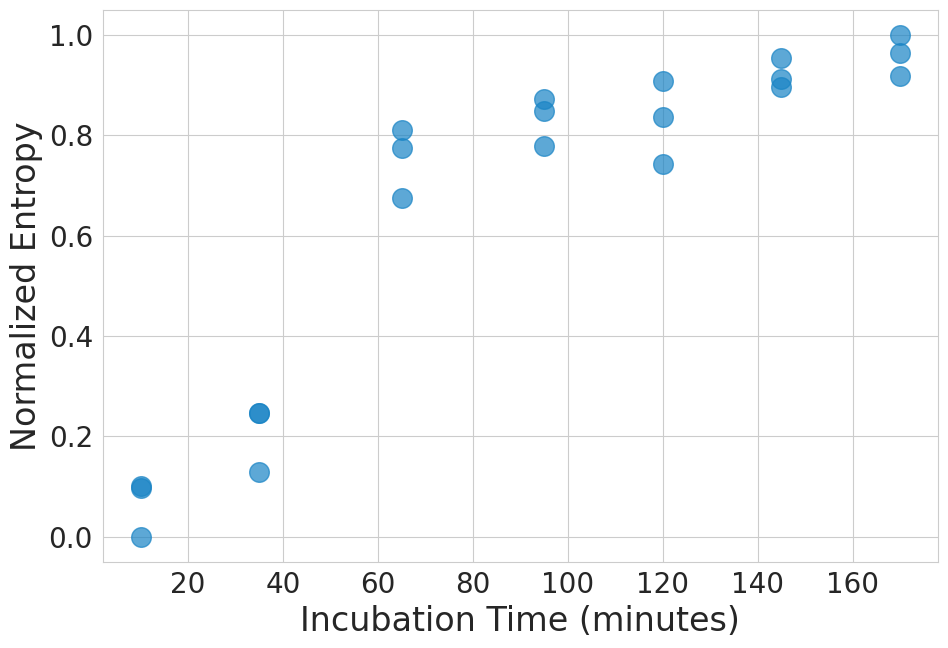

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your main DataFrame and already loaded
# Filter the DataFrame to get the rows where Time is 150
time_150_df = df[df['Time'] == 100]

# Set the style of seaborn for prettier plots
sns.set_style('whitegrid')

# Use the same figure size and font settings as your pretty plot
plt.figure(figsize=(10, 7))
plt.rc('font', size=24)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)

# Plot Aging Time vs Entropy at Time = 150
normalized_entropy = (time_150_df['Normalized_Entropy'] - time_150_df['Normalized_Entropy'].min()) / (time_150_df['Normalized_Entropy'].max() - time_150_df['Normalized_Entropy'].min())

# Plotting
plt.scatter(time_150_df['Aging time (minutes)'], normalized_entropy, color='#1984c5', alpha=0.7, s=200)
# Setting titles and labels
plt.xlabel('Incubation Time (minutes)')
plt.ylabel('Normalized Entropy')

# Creating a legend
#plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


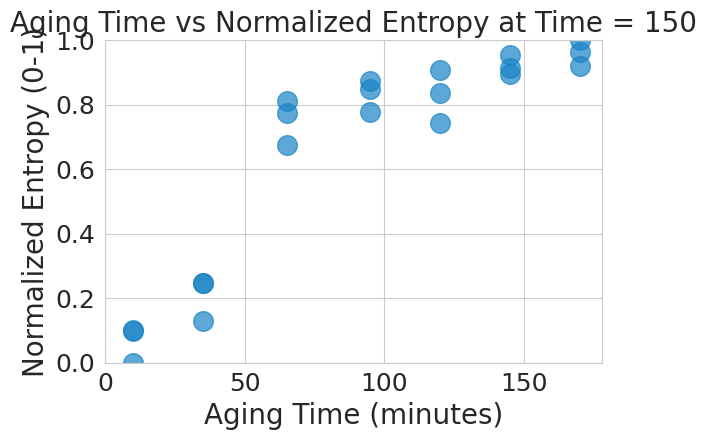

In [26]:
# Normalize 'Normalized_Entropy' to be between 0 and 1
normalized_entropy = (time_150_df['Normalized_Entropy'] - time_150_df['Normalized_Entropy'].min()) / (time_150_df['Normalized_Entropy'].max() - time_150_df['Normalized_Entropy'].min())

# Plotting
plt.scatter(time_150_df['Aging time (minutes)'], normalized_entropy, color='#1984c5', alpha=0.7, s=200)

# Setting titles and labels
plt.title('Aging Time vs Normalized Entropy at Time = 150')
plt.xlabel('Aging Time (minutes)')
plt.ylabel('Normalized Entropy (0-1)')

# Customizing the axes
plt.xlim(left=0)
plt.ylim(0, 1)  # Since the data is normalized, the y-axis should go from 0 to 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


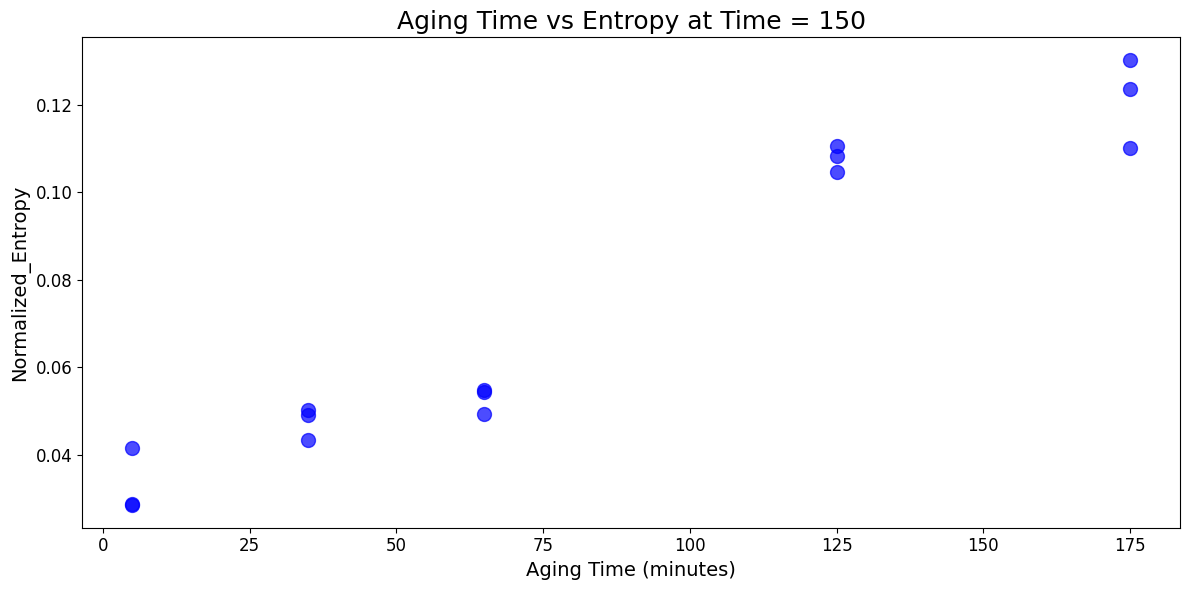

In [36]:
# Filter the DataFrame to get the rows where Time is 150
time_150_df = df[df['Time'] == 150]

# Plot Aging Time vs Entropy at Time = 150 with improved aesthetics
plt.figure(figsize=(12, 6))
plt.scatter(time_150_df['Aging time (minutes)'], time_150_df['Normalized_Entropy'], color='blue', alpha=0.7, s=100)
plt.title('Aging Time vs Entropy at Time = 150', fontsize=18)
plt.xlabel('Aging Time (minutes)', fontsize=14)
plt.ylabel('Normalized_Entropy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [37]:
time_150_df

,,Video,Time,Entropy,Aging time (minutes),Normalized_Entropy
Video,,,,,,
125_min_1.avi,1889,125_min_1.avi,150,5.881786,125,0.104629
125_min_2.avi,757,125_min_2.avi,150,5.903852,125,0.110697
125_min_3.avi,2504,125_min_3.avi,150,5.902604,125,0.108368
175_min_1.avi,325,175_min_1.avi,150,6.073102,175,0.123692
175_min_2.avi,2064,175_min_2.avi,150,6.037800,175,0.130415
175_min_3.avi,932,175_min_3.avi,150,5.999043,175,0.110154
35_min_1.avi,150,35_min_1.avi,150,5.526143,35,0.050224
35_min_2.avi,1372,35_min_2.avi,150,5.571705,35,0.048986
35_min_3.avi,2679,35_min_3.avi,150,5.537017,35,0.043447


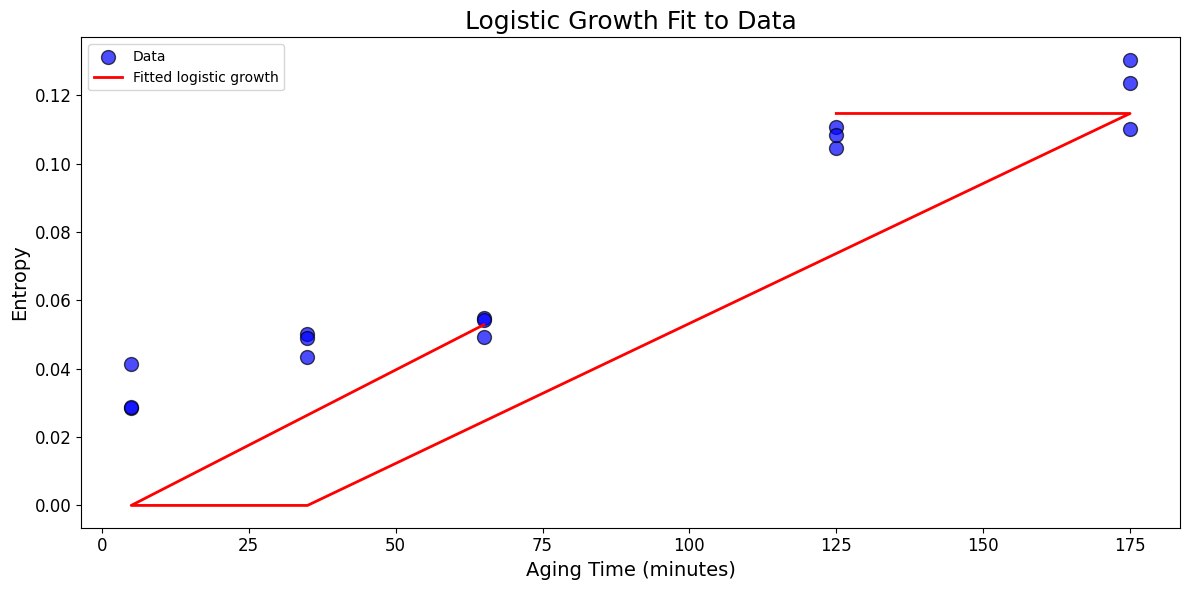

In [39]:
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_growth(t, L, k, t_0):
    return L / (1 + np.exp(-k * (t - t_0)))

# Extract the x and y data
x_data = time_150_df['Aging time (minutes)']
y_data = time_150_df['Normalized_Entropy']

# Provide initial estimates for L, k, t_0
initial_guesses = [max(y_data), 1, np.median(x_data)]

# Fit the logistic model to the data
params, covariance = curve_fit(logistic_growth, x_data, y_data, p0=initial_guesses)

# Extract the parameters
L, k, t_0 = params

# Generate fitted values
fitted_y = logistic_growth(x_data, *params)

# Plot the original data and the fitted curve
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, color='blue', alpha=0.7, edgecolor='black', s=100, label='Data')
plt.plot(x_data, fitted_y, color='red', linewidth=2, label='Fitted logistic growth')
plt.title('Logistic Growth Fit to Data', fontsize=18)
plt.xlabel('Aging Time (minutes)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
df

Video  Time   Entropy  Aging time (minutes)  \
Video                                                                     
125_min_1.avi 1739  125_min_1.avi     0  5.324673                   125   
              1740  125_min_1.avi     1  5.329613                   125   
              1741  125_min_1.avi     2  5.328736                   125   
              1742  125_min_1.avi     3  5.335121                   125   
              1743  125_min_1.avi     4  5.339168                   125   
...                           ...   ...       ...                   ...   
65_min_3.avi  1217   65_min_3.avi   170  5.626785                    65   
              1218   65_min_3.avi   171  5.632834                    65   
              1219   65_min_3.avi   172  5.629700                    65   
              1220   65_min_3.avi   173  5.627434                    65   
              1221   65_min_3.avi   174  5.631035                    65   

                    Normalized_Entropy  
Video                                   
125_min_1.avi 1739            0.000000  
              1740            0.000928  
              1741            0.000763  
              1742            0.001962  
              1743            0.002722  
...                                ...  
65_min_3.avi  1217            0.056949  
              1218            0.058085  
              1219            0.057496  
              1220            0.057071  
              1221            0.057747  

[2871 rows x 5 columns]

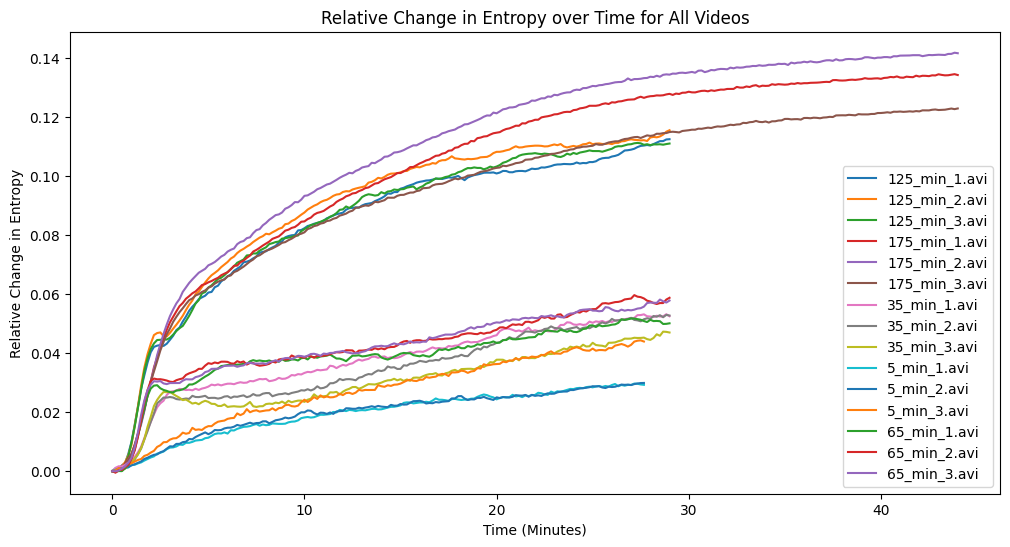

In [ ]:
# Plotting all videos on the same plot with normalized entropy
plt.figure(figsize=(12, 6))

for video_name in df['Video'].unique():
    video_df = df[df['Video'] == video_name]
    plt.plot(video_df['Time'] * 10 / 60, video_df['Normalized_Entropy'], label=video_name)

plt.xlabel('Time (Minutes)')
plt.ylabel('Relative Change in Entropy')
plt.title('Relative Change in Entropy over Time for All Videos')
plt.legend()
plt.show()


In [ ]:
df

Video  Time   Entropy  Minutes  Normalized_Entropy
Video                                                                         
125_min_1.avi 1739  125_min_1.avi     0  5.324673      125            0.000000
              1740  125_min_1.avi     1  5.329613      125            0.000928
              1741  125_min_1.avi     2  5.328736      125            0.000763
              1742  125_min_1.avi     3  5.335121      125            0.001962
              1743  125_min_1.avi     4  5.339168      125            0.002722
...                           ...   ...       ...      ...                 ...
65_min_3.avi  1217   65_min_3.avi   170  5.626785       65            0.056949
              1218   65_min_3.avi   171  5.632834       65            0.058085
              1219   65_min_3.avi   172  5.629700       65            0.057496
              1220   65_min_3.avi   173  5.627434       65            0.057071
              1221   65_min_3.avi   174  5.631035       65            0.057747

[2871 rows x 5 columns]

In [2]:
def calculate_entropy(image):
    """Calculate the entropy of an image."""
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    hist = hist / hist.sum()
    entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))
    return entropy

def process_avi_files(folder_path):
    """Process all AVI files in the given folder and store results in a DataFrame."""
    data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".avi"):
            cap = cv2.VideoCapture(os.path.join(folder_path, filename))

            frame_count = 0
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                entropy = calculate_entropy(gray_frame)
                data.append({'Video': filename, 'Time': frame_count, 'Entropy': entropy})
                frame_count += 1

            cap.release()

    return pd.DataFrame(data)



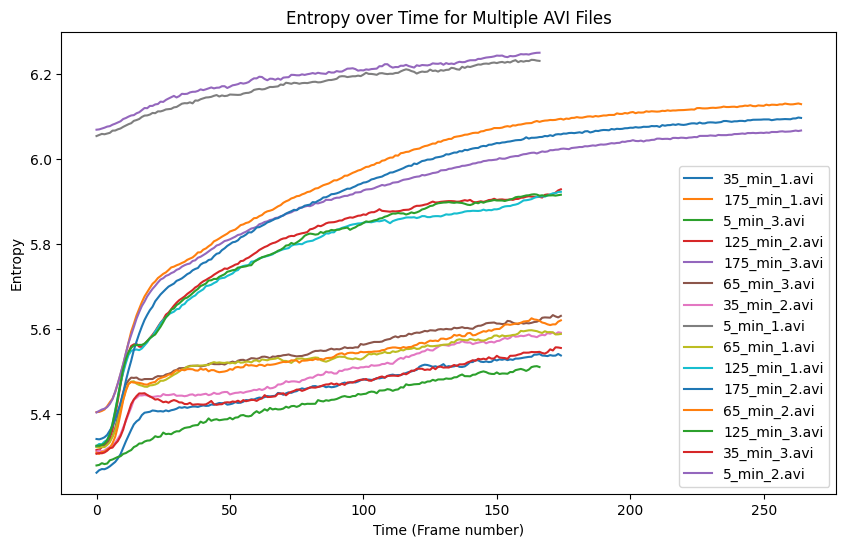

In [3]:

# Folder containing AVI files
folder_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/same_pH'  # Replace with your folder path

# Process AVI files and save results in a DataFrame
df = process_avi_files(folder_path)

# Plotting
plt.figure(figsize=(10, 6))
for video_name in df['Video'].unique():
    video_df = df[df['Video'] == video_name]
    plt.plot(video_df['Time'], video_df['Entropy'], label=video_name)

plt.xlabel('Time (Frame number)')
plt.ylabel('Entropy')
plt.title('Entropy over Time for Multiple AVI Files')
plt.legend()
plt.show()

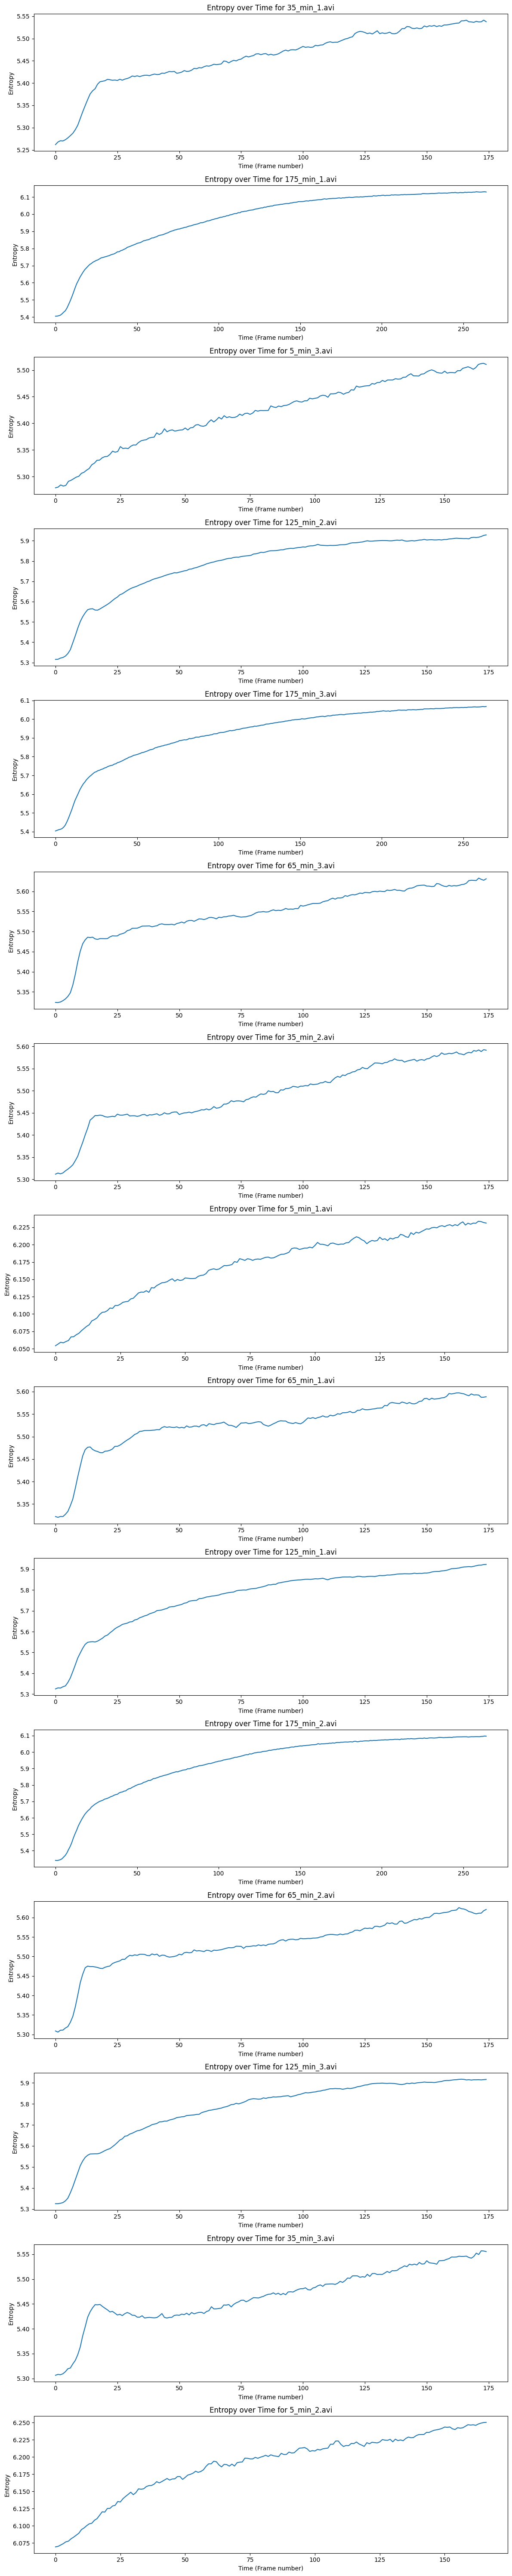

In [8]:
# Plotting each video in an individual plot with fixed y-axis range
unique_videos = df['Video'].unique()
num_videos = len(unique_videos)
plt.figure(figsize=(12, 4 * num_videos))

for i, video_name in enumerate(unique_videos, 1):
    plt.subplot(num_videos, 1, i)
    video_df = df[df['Video'] == video_name]
    plt.plot(video_df['Time'], video_df['Entropy'])
    plt.title(f'Entropy over Time for {video_name}')
    plt.xlabel('Time (Frame number)')
    plt.ylabel('Entropy')

plt.tight_layout()
plt.show()